In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from surprise import Dataset, Reader, BaselineOnly
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.prediction_algorithms.algo_base import AlgoBase
from surprise.model_selection import cross_validate
from tqdm import tqdm
import csv
import pandas as pd
from surprise import NMF
from surprise import Dataset
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from collections import defaultdict
from surprise import Dataset, NormalPredictor, Reader
from surprise.prediction_algorithms.knns import KNNWithMeans

In [2]:
rating = pd.read_csv("ratings.csv")
tag = pd.read_csv("tags.csv")
movie = pd.read_csv("movies.csv")
link = pd.read_csv("links.csv")

In [3]:
rating

,Unnamed: 0,userId,movieId,rating,timestamp
0,0,496,112852,3.0,1415520462
1,1,391,1947,4.0,1030945141
2,2,387,1562,1.5,1095041022
3,3,474,2716,4.5,1053020930
4,4,483,88125,4.5,1311337237
...,...,...,...,...,...
100831,100831,469,1219,4.0,965661925
100832,100832,599,3571,2.0,1498511343
100833,100833,414,276,3.0,961596299
100834,100834,395,168,3.0,841503984


# Question 1A

In [4]:
user_num = len(set(rating["userId"]))
movie_num = len(set(rating["movieId"]))
rating_num = len(rating["rating"])

In [5]:
sparsity = rating_num / (movie_num*user_num)
print("Sparsity is", sparsity)

Sparsity is 0.016999683055613623


# Question 1B

Text(0.5, 1.0, 'Frequency of the Rating Values')

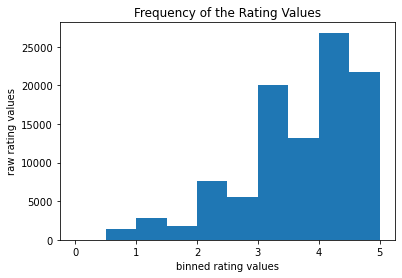

In [6]:
bins = np.linspace(0,5,num=11)
rating_value = rating["rating"]
plt.hist(rating_value, bins=bins)
plt.xlabel("binned rating values")
plt.ylabel("raw rating values")
plt.title("Frequency of the Rating Values")

Shape of the raw rating values approximately have trend of increasing but non-monotonically. 

# Question 1C

Text(0.5, 1.0, 'Distribution of Ratings Received Among Movies')

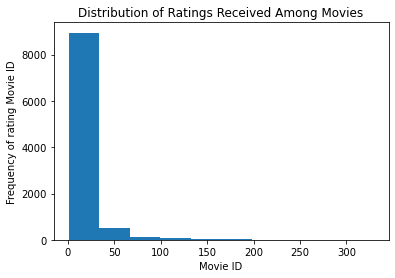

In [7]:
movie_index = rating["movieId"]
counter = Counter(movie_index)
counter_dec = sorted(list(counter.values()), reverse=True)
plt.hist(counter_dec)
plt.xlabel("Movie ID")
plt.ylabel("Frequency of rating Movie ID")
plt.title("Distribution of Ratings Received Among Movies")

# Question 1D

Text(0.5, 1.0, 'Distribution of Ratings Received Among Users')

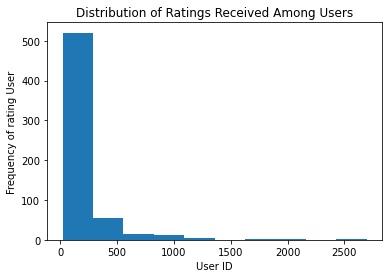

In [8]:
user_index = rating["userId"]
counter_user = Counter(user_index)
counter_dec_user = sorted(list(counter_user.values()), reverse=True)
plt.hist(counter_dec_user)
plt.xlabel("User ID")
plt.ylabel("Frequency of rating User")
plt.title("Distribution of Ratings Received Among Users")

# Question 1E
Distribution of both graphs have decreasing trend. Both of them have high frequency low movie ID and user ID. It shows that more lower movie ID was rated and people has low user ID rate more movie than high user ID. 

# Question 1F

In [9]:
rating_value = rating[["rating", "movieId"]]
vars_value = rating_value.groupby(['movieId']).var()
vars_value

,rating
movieId,
1,0.696990
2,0.777419
3,1.112651
4,0.726190
5,0.822917
...,...
193581,NaN
193583,NaN
193585,NaN


Text(0.5, 1.0, 'variance of the rating values received by each movie')

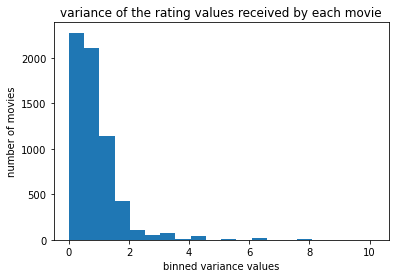

In [10]:
plt.hist(vars_value, bins=20)
plt.xlabel("binned variance values")
plt.ylabel("number of movies")
plt.title("variance of the rating values received by each movie")

The shape of the variance plot has a decreasing trend. Most of the variance values focus on interval 0 to 2. After variance value=2, there's not too many movies. 

# Q2

A: $ \mu_u = 	\frac {\sum_{i \in I_u} r_{ui}} {||I_u||} $

B: It means user u and user v have same set of rating item indices. It can be empty set because u and v may not rate same movie. Also rating matrix R is sparse also show that it is possible for user u and v rate totally different movies.

# Q3

Mean-centering the raw ratings redefine the point for predictor to be centered. It shifts the scale over, but retains the units. The effect is that the slope between the predictor and rating value we predict does not change at all. For instance, if there are users A and B, and both of them have extreme rating habit. A only rate the movie from 1 to 3, and B only rate the movie 4 to 6. If we don't subtract the mean, we will predict similar rating for A and B which is not accurate. 

# Q4

In [11]:
reader = Reader(rating_scale=(0,5))
data_rating = Dataset.load_from_df(rating[["userId","movieId","rating"]], reader=reader)

In [12]:
df_q4=pd.DataFrame()
temp = {}

In [13]:
for x in tqdm(range(2,102,2)):
    the = cross_validate(KNNWithMeans(sim_options={'name':'pearson'},k=x,verbose=False),data_rating,cv=10,verbose=False)
    temp[x]=the
    row1 = {
    "k": x,
    "Average_Rmse": np.mean(the["test_rmse"]),
    "Average_Mae": np.mean(the["test_mae"])
    }
    row1 = pd.DataFrame([row1])
    df_q4 = pd.concat([df_q4,row1], ignore_index=False)

 10%|████▍                                       | 5/50 [01:29<13:27, 17.94s/it]


KeyboardInterrupt: 

In [ ]:
print(df_q4)

In [ ]:
plt.plot(df_q4["k"],df_q4["Average_Rmse"] , label = "Average Rmse")
plt.legend()
plt.show()
plt.plot(df_q4["k"],df_q4["Average_Mae"] , label = "Average Mae")
plt.legend()
plt.show()

# Q5

k=30

# Q6

In [ ]:
data_movies = movie
data_ratings = rating.dropna()

In [ ]:
#R=np.zeros((data_ratings['userId'].max()+1,data_ratings['movieId'].max()+1))

In [ ]:
#df=zip(data_ratings['userId'],data_ratings['movieId'],data_ratings['rating'])

In [ ]:
#for user,movie,rating in df:
#    R[user][movie]=rating

In [ ]:
#R.shape

In [ ]:
#num_users=R.shape[0]
#num_movies=R.shape[1]

In [ ]:
vars_value = rating_value.groupby(['movieId'],as_index=False).var()

In [ ]:
#Subset
#Popular
popular = data_ratings[data_ratings['movieId'].map(data_ratings['movieId'].value_counts()) > 2].reset_index(drop=True)
#Unpopular
unpopular = data_ratings[data_ratings['movieId'].map(data_ratings['movieId'].value_counts()) <= 2].reset_index(drop=True)
#High variance
hii = data_ratings[data_ratings['movieId'].map(data_ratings['movieId'].value_counts()) >= 5].reset_index(drop=True)

high = hii[hii['movieId'].isin(set(vars_value.loc[vars_value["rating"]>=2]["movieId"]))].reset_index(drop=True)

In [ ]:
reader = Reader(rating_scale=(0,5))
data_pop = Dataset.load_from_df(popular[["userId","movieId","rating"]], reader=reader)

In [ ]:
df_q6_pop=pd.DataFrame()
temp_pop = {}

In [ ]:
for x in tqdm(range(2,102,2)):
    kf = KFold(n_splits=10)

    algo = KNNWithMeans(sim_options={'name':'pearson'},k=x,verbose=False)

    the = []
    for trainset, testset in kf.split(data_pop):

        # train and test algorithm.
        algo.fit(trainset)
        predictions = algo.test(testset)

        # Compute and print Root Mean Squared Error
        the.append(accuracy.rmse(predictions, verbose=False))
    temp_pop[x]=the
    row1 = {
    "k": x,
    "Average_Rmse": np.mean(the)
    }
    row1 = pd.DataFrame([row1])
    df_q6_pop = pd.concat([df_q6_pop,row1], ignore_index=False)

In [ ]:
data_unpop = Dataset.load_from_df(unpopular[["userId","movieId","rating"]], reader=reader)
df_q6_unpop=pd.DataFrame()
temp_unpop = {}

In [ ]:
for x in tqdm(range(2,102,2)):
    kf = KFold(n_splits=10)

    algo = KNNWithMeans(sim_options={'name':'pearson'},k=x,verbose=False)

    the = []
    for trainset, testset in kf.split(data_unpop):

        # train and test algorithm.
        algo.fit(trainset)
        predictions = algo.test(testset)

        # Compute and print Root Mean Squared Error
        the.append(accuracy.rmse(predictions, verbose=False))
    temp_unpop[x]=the
    row1 = {
    "k": x,
    "Average_Rmse": np.mean(the)
    }
    row1 = pd.DataFrame([row1])
    df_q6_unpop = pd.concat([df_q6_unpop,row1], ignore_index=False)

In [ ]:
data_high = Dataset.load_from_df(high[["userId","movieId","rating"]], reader=reader)
df_q6_high=pd.DataFrame()
temp_high = {}

In [ ]:
for x in tqdm(range(2,102,2)):
    kf = KFold(n_splits=10)

    algo = KNNWithMeans(sim_options={'name':'pearson'},k=x,verbose=False)

    the = []
    for trainset, testset in kf.split(data_high):

        # train and test algorithm.
        algo.fit(trainset)
        predictions = algo.test(testset)

        # Compute and print Root Mean Squared Error
        the.append(accuracy.rmse(predictions, verbose=False))
    temp_unpop[x]=the
    row1 = {
    "k": x,
    "Average_Rmse": np.mean(the)
    }
    row1 = pd.DataFrame([row1])
    df_q6_high = pd.concat([df_q6_high,row1], ignore_index=False)

In [ ]:
plt.plot(df_q6_pop["k"],df_q6_pop["Average_Rmse"] , label = "Popular Average Rmse")
plt.legend()
plt.show()
plt.plot(df_q6_unpop["k"],df_q6_unpop["Average_Rmse"] , label = "UnPopular Average Rmse")
plt.legend()
plt.show()
plt.plot(df_q6_high["k"],df_q6_high["Average_Rmse"] , label = "HighVeriance Average Rmse")
plt.legend()
plt.show()

# Q7

Yes, with fixed U, the equation is just as a least square problem where r is y and U is k and V^T is x. Least square is convex thus this equation is convex.

# Q8 A

In [ ]:
kfold=KFold(10,shuffle=True,random_state=42)

In [ ]:
reader = Reader(rating_scale=(0.5, 5))

In [ ]:
def train_and_predict(dataset):
    kdict=defaultdict(tuple)
    for k in range(2,52,2):
        RMSE=0
        MAE=0
        for train_idx,valid_idx in kfold.split(dataset):
            train=Dataset.load_from_df(dataset.loc[train_idx,['userId','movieId','rating']],reader)
            validation=dataset.loc[valid_idx,['userId','movieId','rating']].to_numpy()
            nmf=NMF(n_factors=k,random_state=42)
            nmf.fit(train.build_full_trainset())
            predict=np.zeros_like(validation)
            for i in range(validation.shape[0]):
                user,item=validation[i][0],validation[i][1]
                pred=nmf.predict(user,item)
                predict[i]=[user,item,pred.est]
            RMSE+=sqrt(mean_squared_error(validation[:,2],predict[:,2]))
            MAE+=mean_absolute_error(validation[:,2],predict[:,2])
        avgRMSE=RMSE/10
        avgMAE=MAE/10
        print('Done with k of value {}, get an avgRMSE of {} and an avgMAE of {}'.format(k,avgRMSE,avgMAE))
        kdict[k]=(avgRMSE,avgMAE)
    return kdict

In [ ]:
k_dict=train_and_predict(data_ratings)

In [ ]:
def plot_graph(error_dict,title):
    Xs=list(error_dict.keys())
    RMSEs,MAEs=list(zip(*error_dict.values()))
    plt.plot(Xs,RMSEs,label='RMSE')
    plt.plot(Xs,MAEs,label='MAE')
    plt.title(title)
    plt.xlabel('k')
    plt.ylabel('error')
    plt.legend()
    plt.show()

In [ ]:
def plot_RMSE(error_dict,title):
    Xs=list(error_dict.keys())
    RMSEs,MAEs=list(zip(*error_dict.values()))
    plt.plot(Xs,RMSEs,label='RMSE')
    plt.title(title)
    plt.xlabel('k')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()

In [ ]:
plot_graph(k_dict,'RMSE_MAE_FOR_ORIGINAL')

# Q8 B

The minimum average RMSE is 0.9132728166746364 and minimum avgMAE is 0.6948384242116434. This happens when we have a k of 18 which is the same as number of movie genres

# Q8 C

In [ ]:
# popular
print('popular')
pop_kdict=train_and_predict(popular)
# unpopular
print('unpopular')
unpop_kdict=train_and_predict(unpopular)
# high
print('high variance')
high_var_kdict=train_and_predict(high)

In [ ]:
plot_RMSE(pop_kdict,'RMSE_FOR_POPULAR')
plot_RMSE(unpop_kdict,'RMSE_FOR_UNPOPULAR')
plot_RMSE(high_var_kdict,'RMSE_FOR_HIGH_VARIANCE')

# ROC

# Q9

In [ ]:
nmf9=NMF(n_factors=20,random_state=42)
formattedR=Dataset.load_from_df(data_ratings[['userId','movieId','rating']],reader)
train=formattedR.build_full_trainset()
nmf9.fit(train)
user_factors=nmf9.pu
item_factors=nmf9.qi

In [ ]:
idxToMovId=defaultdict(int)
for i in range(train.n_items):
    idxToMovId[i]=train.to_raw_iid(i)

In [ ]:
movToGenre=zip(data_movies['movieId'],data_movies['genres'])
movDict={movID:genre for movID, genre in movToGenre}

In [ ]:
cols=[]
for i in range(item_factors.shape[1]):
    col=[]
    for j in range(item_factors.shape[0]):
        col.append((item_factors[j][i],j))
    cols.append(col)

In [ ]:
#j rows in item factors indicates the jth item
from collections import defaultdict
freq=defaultdict(int)
all_cols_top_10_genres=[]
for i in range(len(cols)):
    top_10_genres=[]
    col=cols[i]
    col=sorted(col,reverse=True)
    for factor,idx in col[:10]:
        movID=idxToMovId[idx]
        genres=movDict[movID]
        for genre in genres.split('|'):
            freq[genre]+=1
        top_10_genres.append(genres)
    all_cols_top_10_genres.append(top_10_genres)   

In [ ]:
for col in all_cols_top_10_genres:
    print(col)

In [ ]:
sortedFreq=sorted(freq.items(), key=lambda x:x[1], reverse=True)
sortedFreq

most top 10 movie belongs to Comedy 

connection between latent factor and movie genres: each row i in the item latent factor indicates factors for the ith item in the original dataset. The ith item in the original dataset has a corresponding moveID. We can use the corresponding movieID to fetch the genre of the movie using the movies.csv dataset

# Q10 A

In [ ]:
def bias_train_predict(dataset):
    bias_k_dict=defaultdict(tuple)
    for k in range(2,52,2):
        RMSE=0
        MAE=0
        for train_idx,valid_idx in kfold.split(dataset):
            train=Dataset.load_from_df(dataset.loc[train_idx,['userId','movieId','rating']],reader)
            validation=dataset.loc[valid_idx,['userId','movieId','rating']].to_numpy()
            nmf=NMF(n_factors=k,random_state=42,biased=True)
            nmf.fit(train.build_full_trainset())
            predict=np.zeros_like(validation)
            for i in range(validation.shape[0]):
                user,item=validation[i][0],validation[i][1]
                pred=nmf.predict(user,item)
                predict[i]=[user,item,pred.est]
            RMSE+=sqrt(mean_squared_error(validation[:,2],predict[:,2]))
            MAE+=mean_absolute_error(validation[:,2],predict[:,2])
        avgRMSE=RMSE/10
        avgMAE=MAE/10
        print('Done with k of value {}, get an avgRMSE of {} and an avgMAE of {}'.format(k,avgRMSE,avgMAE))
        bias_k_dict[k]=(avgRMSE,avgMAE)
    return bias_k_dict

In [ ]:
bias_k_dict=bias_train_predict(data_ratings)

# Q10 B

In [ ]:
plot_graph(bias_k_dict,'RMSE_MAE_FOR_ORIGINAL_BIAS')

# Q10 C

In [ ]:
# popular
print('popular')
bias_pop_kdict=train_and_predict(popular)
# unpopular
print('unpopular')
bias_unpop_kdict=train_and_predict(unpopular)
# high
print('high variance')
bias_high_var_kdict=train_and_predict(high)

In [ ]:
plot_RMSE(bias_pop_kdict,'RMSE_FOR_POPULAR_BIAS')
plot_RMSE(bias_unpop_kdict,'RMSE_FOR_UNPOPULAR_BIAS')
plot_RMSE(bias_high_var_kdict,'RMSE_FOR_HIGH_VARIANCE_BIAS')

# ROC

# Q11A

In [ ]:
def naive_train_predict(dataset):
    naive_RMSE=0
    dropped_rows=[]
    for train_idx,valid_idx in kfold.split(dataset):
        train,validation=dataset.loc[train_idx,['userId','movieId','rating']].to_numpy(),dataset.loc[valid_idx,['userId','movieId','rating']].to_numpy()
        user_ratings=defaultdict(list)
        for user,movie,rating in train:
            user_ratings[user].append(rating)
        prediction=np.zeros_like(validation)
        for i in range(validation.shape[0]):
            user=validation[i][0]
            item=validation[i][1]
            # if user in validation hasn't rated any movie in training set
            if(len(user_ratings[user])==0): 
                dropped_rows.append(i)
                continue
            prediction[i]=[user,item,sum(user_ratings[user])/len(user_ratings[user])]
        np.delete(validation,dropped_rows,0)
        np.delete(prediction,dropped_rows,0)
        naive_RMSE+=sqrt(mean_squared_error(validation[:,2],prediction[:,2]))
    naive_avgRMSE=naive_RMSE/10
    return naive_avgRMSE

In [ ]:
naive_RMSE_original=naive_train_predict(data_ratings)

In [ ]:
print('average RMSE for original dataset {}'.format(naive_RMSE_original))

# Q11 B

In [ ]:
# popular
print('popular')
naive_pop_kdict=naive_train_predict(popular)
# unpopular
print('unpopular')
naive_unpop_kdict=naive_train_predict(unpopular)
# high
print('high variance')

naive_high_var_kdict=naive_train_predict(high)

In [ ]:
print('average RMSE for popular subset {}'.format(naive_pop_kdict))
print('average RMSE for unpopular subset {}'.format(naive_unpop_kdict))
print('average RMSE for high variance subset {}'.format(naive_high_var_kdict))

# Q12 

# Q13

Precision: among all items we recommended to user, how many items are truly liked by the user

Recall: among all items the user like, how many items that user actually like are recommended to the user by us. 

# Q14

In [ ]:
def get_precision_recall(model):
    precision_t=defaultdict(list)
    recall_t=defaultdict(list)
    threshold=3
    for t in range(1,26,1):
        folds_precision=0
        folds_recall=0
        for train_idx,valid_idx in kfold.split(data_ratings):
            train=Dataset.load_from_df(data_ratings.loc[train_idx,['userId','movieId','rating']],reader)
            validation=data_ratings.loc[valid_idx,['userId','movieId','rating']].to_numpy()
            #consider chaging this to model to be general and modulize this
#             nmf=NMF(n_factors=18,random_state=42)
            model.fit(train.build_full_trainset())
            L=defaultdict(list)
            G=defaultdict(set)
            users=set()
            for i in range(validation.shape[0]):
                user,item,rating=validation[i][0],validation[i][1],validation[i][2]
                pred=model.predict(user,item)
                L[user].append((pred.est,item))
                if rating>threshold:
                    G[user].add(item)
                users.add(user)
            for user in users:
                L[user]=sorted(L[user],reverse=True)
            S_t=defaultdict(set)
            countOfUser=0
            precision=0
            recall=0
            for user in users:
                if len(L[user])<t or len(G[user])==0:
                    continue
                S_t[user]=set([iid for r,iid in L[user][:t]])
                precision+=len(S_t[user].intersection(G[user]))/len(S_t[user])
                recall+=len(S_t[user].intersection(G[user]))/len(G[user])              
                countOfUser+=1
            folds_precision+=precision/countOfUser
            folds_recall+=recall/countOfUser
        precision_t[t]=folds_precision/10
        recall_t[t]=folds_recall/10
        print('Done with t of {} get a precision {} and a recall {}'.format(t,precision_t[t],recall_t[t]))
    return precision_t,recall_t

In [ ]:
precision_t,recall_t=get_precision_recall(NMF(n_factors=18,random_state=42))

In [ ]:
precision_t_KNN, recall_t_KNN=get_precision_recall(KNNWithMeans(sim_options={'name':'pearson'},k=30,verbose=False))

In [ ]:
precision_t_bias,recall_t_bias=get_precision_recall(NMF(n_factors=18,random_state=42,biased=True))